# Importing dataset and **dependencies**

In [1]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.2 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
ds=tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.704M6A_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.704M6A_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


# Building Dataset and Dataset Visualzation

In [4]:
import numpy as np
dataiterator= ds.as_numpy_iterator()
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

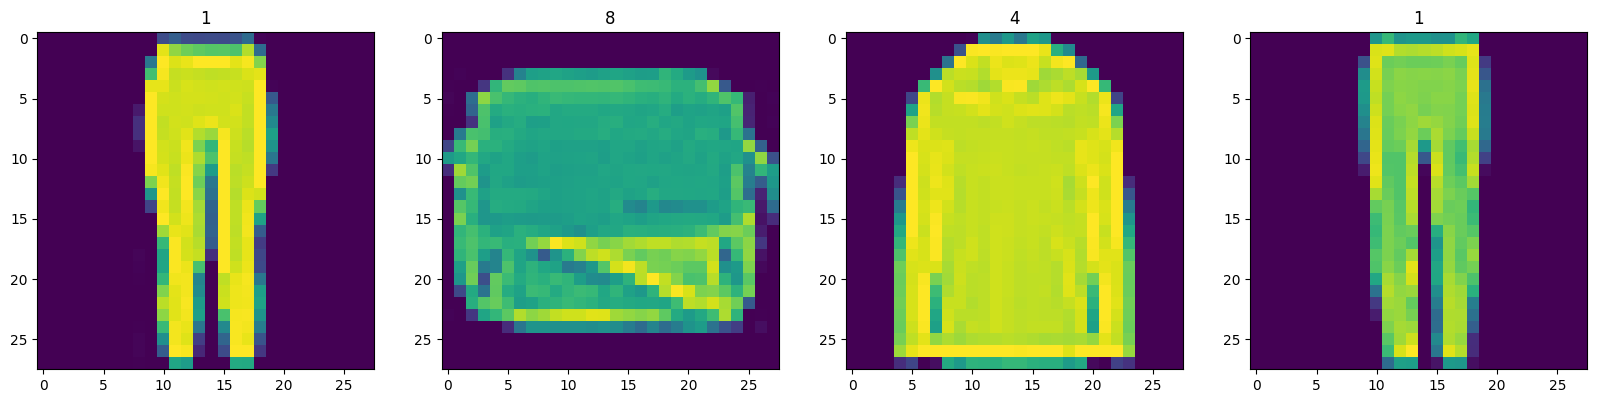

In [5]:
# Visualization of the data
fig, ax= plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
  batch=dataiterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [6]:
def scale_images(data):
  image=data['image']
  return image/255

In [7]:
ds=tfds.load('fashion_mnist',split='train')
ds=ds.map(scale_images)
ds=ds.cache()
ds=ds.shuffle(60000)
ds=ds.batch(128)
ds=ds.prefetch(64)

In [8]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Building the Neural Network

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [10]:
def build_generator():
  model=Sequential()

  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

  return model

In [11]:
generator=build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [12]:
img=generator.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 2s 2s/step


array([[[[0.49231568],
         [0.49390587],
         [0.48984236],
         ...,
         [0.4955623 ],
         [0.49637005],
         [0.49950933]],

        [[0.5014818 ],
         [0.5078804 ],
         [0.5012564 ],
         ...,
         [0.49938598],
         [0.4987965 ],
         [0.50026083]],

        [[0.5041358 ],
         [0.50930256],
         [0.5069225 ],
         ...,
         [0.49864018],
         [0.49648932],
         [0.50260544]],

        ...,

        [[0.5060625 ],
         [0.5074859 ],
         [0.5037342 ],
         ...,
         [0.49729973],
         [0.49359217],
         [0.49756926]],

        [[0.5076866 ],
         [0.5047168 ],
         [0.5021766 ],
         ...,
         [0.4994222 ],
         [0.49849126],
         [0.4996155 ]],

        [[0.50571865],
         [0.50586975],
         [0.5082577 ],
         ...,
         [0.5050196 ],
         [0.50124156],
         [0.50135833]]],


       [[[0.49573913],
         [0.49075472],
         [0.49

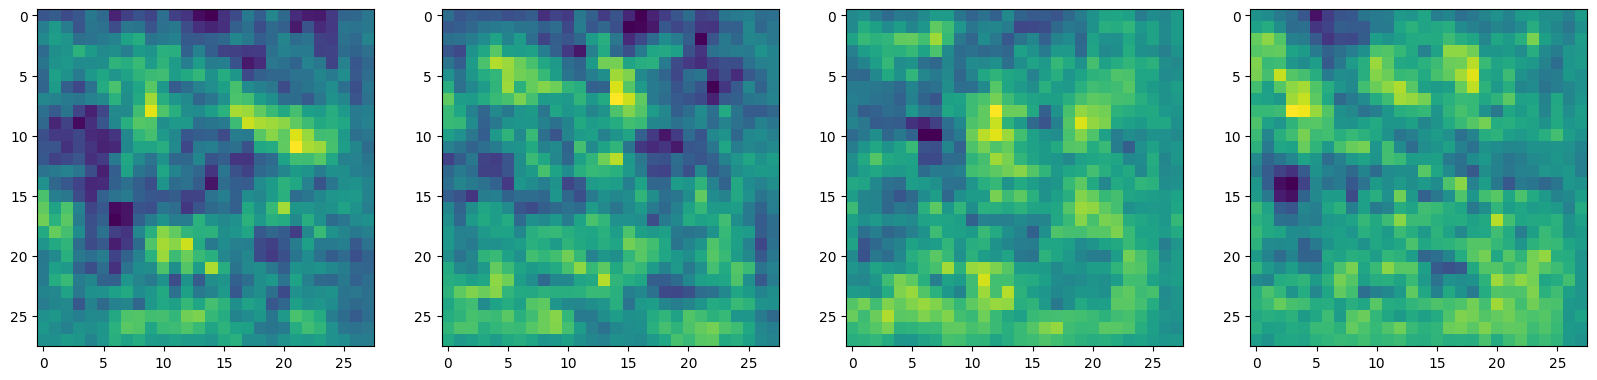

In [13]:
fig, ax= plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))

In [14]:
def build_discriminator():
  model=Sequential()

  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [15]:
discriminator= build_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [16]:
img=generator.predict(np.random.randn(4,128,1))
discriminator.predict(img)

1/1 [==============================] - 0s 384ms/step


array([[0.49937055],
       [0.49930608],
       [0.49928305],
       [0.49929017]], dtype=float32)

# Constructing the custom Training Loop

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [18]:
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

In [19]:
from tensorflow.keras.models import Model

In [21]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.generator=generator
    self.discriminator=discriminator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().compile(*args,**kwargs)
    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss

  def train_step(self,batch):
    real_images=batch
    fake_images=self.generator(tf.random.normal((128,128,1)),training=False)

    # Discriminator Training

    with tf.GradientTape() as d_tape:
      yhat_real=self.discriminator(real_images,training=True)
      yhat_fake=self.discriminator(fake_images,training=True)
      yhat_realfake=tf.concat([yhat_real,yhat_fake],axis=0)

      y_realfake=tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)

      noise_real=0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake=-0.15*tf.random.uniform(tf.shape(yhat_fake))

      y_realfake+=tf.concat([noise_real,noise_fake],axis=0)

      total_d_loss=self.d_loss(y_realfake,yhat_realfake)

    dgrad=d_tape.gradient(total_d_loss,discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

    # Generator Training
    with tf.GradientTape() as g_tape:
      gen_images=self.generator(tf.random.normal((128,128,1)),training=True)

      predicted_labels= self.discriminator(gen_images, training=False)

      total_g_loss=self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)

    ggrad=g_tape.gradient(total_g_loss,generator.trainable_variables)
    g_opt.apply_gradients(zip(ggrad,generator.trainable_variables))

    return {'d_loss':total_d_loss,'g_loss':total_g_loss}

In [22]:
fashgan=FashionGAN(generator,discriminator)
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

In [25]:
# Building Callback

import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [27]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [28]:
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
469/469 [==============================] - 94s 166ms/step - d_loss: 0.5355 - g_loss: 2.0351
Epoch 2/20
469/469 [==============================] - 77s 163ms/step - d_loss: 0.3737 - g_loss: 2.9725
Epoch 3/20
469/469 [==============================] - 76s 163ms/step - d_loss: 0.2838 - g_loss: 5.8223
Epoch 4/20
469/469 [==============================] - 77s 163ms/step - d_loss: 0.2781 - g_loss: 5.7460
Epoch 5/20
469/469 [==============================] - 76s 163ms/step - d_loss: 0.2761 - g_loss: 5.5343
Epoch 6/20
469/469 [==============================] - 76s 163ms/step - d_loss: 0.2746 - g_loss: 5.2734
Epoch 7/20
469/469 [==============================] - 77s 163ms/step - d_loss: 0.2729 - g_loss: 5.0038
Epoch 8/20
469/469 [==============================] - 77s 163ms/step - d_loss: 0.2717 - g_loss: 4.7260
Epoch 9/20
469/469 [==============================] - 76s 163ms/step - d_loss: 0.2709 - g_loss: 4.4389
Epoch 10/20
469/469 [==============================] - 76s 163ms/step - d

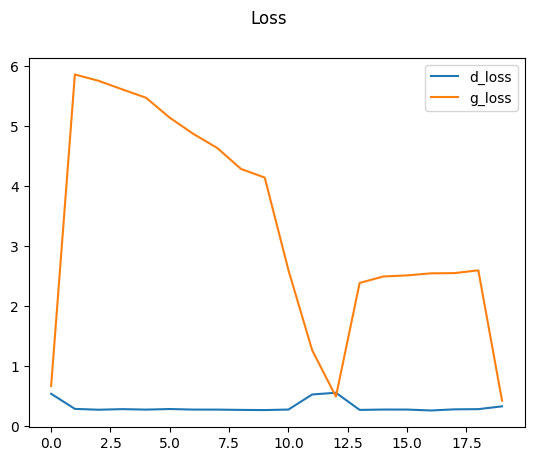

In [29]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# Testing Models

In [1]:
generator.load_weights(os.path.join('generatormodel.h5'))

NameError: name 'generator' is not defined

In [30]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 464ms/step


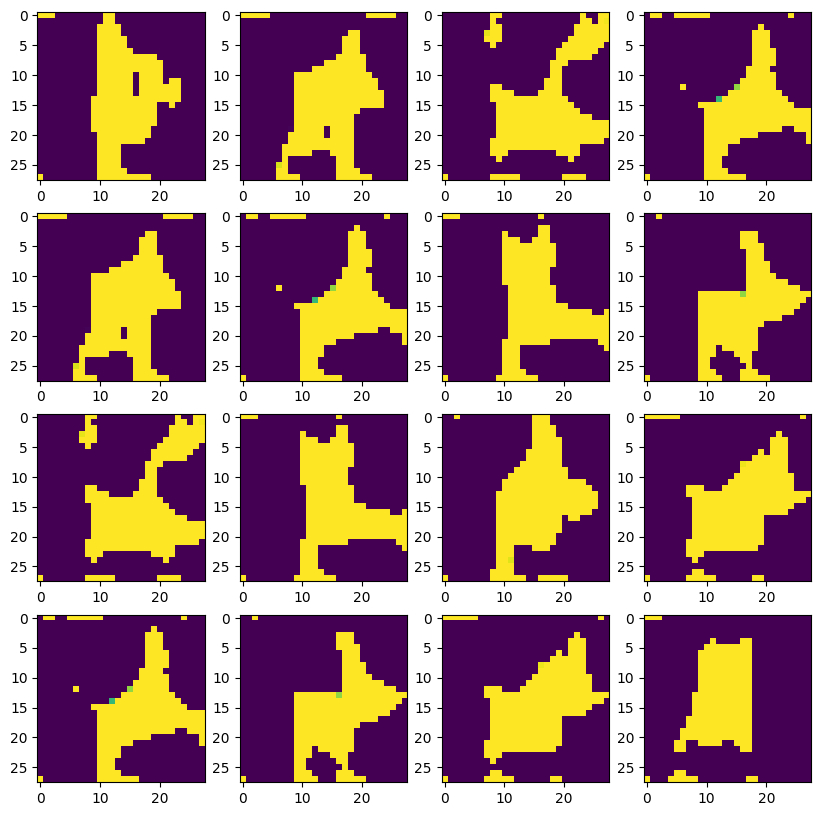

In [32]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')